### Telco Customer Churn Prediction

<b>This project is about predicting whether a customer will change telecommunications provider which is known as "churning".</b>

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

"state", string. 2-letter code of the US state of customer residence<br>
"account_length", numerical. Number of months the customer has been with the current telco provider<br>
"area_code", string="area_code_AAA" where AAA = 3 digit area code.<br>
"international_plan", (yes/no). The customer has international plan.<br>
"voice_mail_plan", (yes/no). The customer has voice mail plan.<br>
"number_vmail_messages", numerical. Number of voice-mail messages.<br>
"total_day_minutes", numerical. Total minutes of day calls.<br>
"total_day_calls", numerical. Total number of day calls.<br>
"total_day_charge", numerical. Total charge of day calls.<br>
"total_eve_minutes", numerical. Total minutes of evening calls.<br>
"total_eve_calls", numerical. Total number of evening calls.<br>
"total_eve_charge", numerical. Total charge of evening calls.<br>
"total_night_minutes", numerical. Total minutes of night calls.<br>
"total_night_calls", numerical. Total number of night calls.<br>
"total_night_charge", numerical. Total charge of night calls.<br>
"total_intl_minutes", numerical. Total minutes of international calls.<br>
"total_intl_calls", numerical. Total number of international calls.<br>
"total_intl_charge", numerical. Total charge of international calls<br>
"number_customer_service_calls", numerical. Number of calls to customer service<br>
"churn", (yes/no). Customer churn - target variable.<br>


### Our Strategy:

1. Basic analysis on train
2. Preprocessing
3. EDA (Univarient, Bivarient) 
4. Vectorization
5. Model Building
6. Hyperparameter tuning

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [24]:
print('Train Data Shape: {}'.format(train.shape))
print('Test Data Shape: {}'.format(test.shape))

Train Data Shape: (4250, 20)
Test Data Shape: (750, 20)


## 1. Basic Stats

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [21]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Need to convert 'yes', 'no' to 1 & 0

In [4]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Check for missing and duplicate values

In [7]:
np.isnan(train.any())

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [14]:
train.duplicated().value_counts()

False    4250
dtype: int64

## 2. Preprocessing

For 'international_plan', 'voice_mail_plan', 'churn' columns values, lets assign 1 for 'yes' & 0 for 'no'

In [103]:
train = train.replace({'international_plan': {'yes':1, 'no':0}, 'voice_mail_plan': {'yes':1, 'no':0}, 
                       'churn':{'yes':1, 'no':0}})

In [44]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [51]:
train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [27]:
# Lets find out categorical vs numerical features
categ_cols = []
num_cols = []
for col in train.columns:
    if train[col].nunique()<10:
        categ_cols.append(col)
    else:
        num_cols.append(col)
        
print('Categorical columns are: {}'.format(categ_cols))
print('\nNumerical columns are: {}'.format(num_cols))

Categorical columns are: ['area_code', 'international_plan', 'voice_mail_plan', 'churn']

Numerical columns are: ['state', 'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [30]:
# Lets move state to categ_cols
categ_cols.append('state')
num_cols.remove('state')

print('Categorical columns are: {}'.format(categ_cols))
print('\nNumerical columns are: {}'.format(num_cols))

Categorical columns are: ['area_code', 'international_plan', 'voice_mail_plan', 'churn', 'state']

Numerical columns are: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [42]:
train.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

## 2. EDA

### 2.1 Univarient Analysis

#### Categorical features

In [145]:
# Remove state for easier data visualization
categ_cols.remove('state')

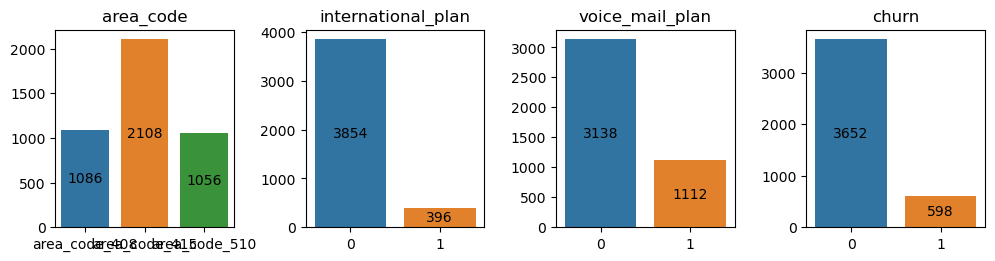

In [151]:
fig = plt.figure(figsize=[12,10])
fig.subplots_adjust(top=0.90, hspace=0.5, wspace=0.4)
for index, col in enumerate(categ_cols):
    # Plotting
    data = np.unique(train[col], return_counts=True)
    ax = fig.add_subplot(3,4,index+1)
    ax = sns.barplot(x=data[0], y=data[1])
    
    # Labelling
    ax.set_title(f'{col}')
    ax.bar_label(ax.containers[0], label_type='center')
plt.show()

#### Numerical features

In [79]:
num_cols.remove('account_length')

In [107]:
num_cols.sort()

['number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [108]:
# Lets sort this list so that our visualization is easier to analyze
num_cols = [
    'total_day_minutes',
    'total_eve_minutes',
    'total_night_minutes',
    'total_intl_minutes',
    'total_eve_calls',
    'total_night_calls',
    'total_day_calls',
    'total_intl_calls',
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge',
    'number_vmail_messages',
    'number_customer_service_calls']

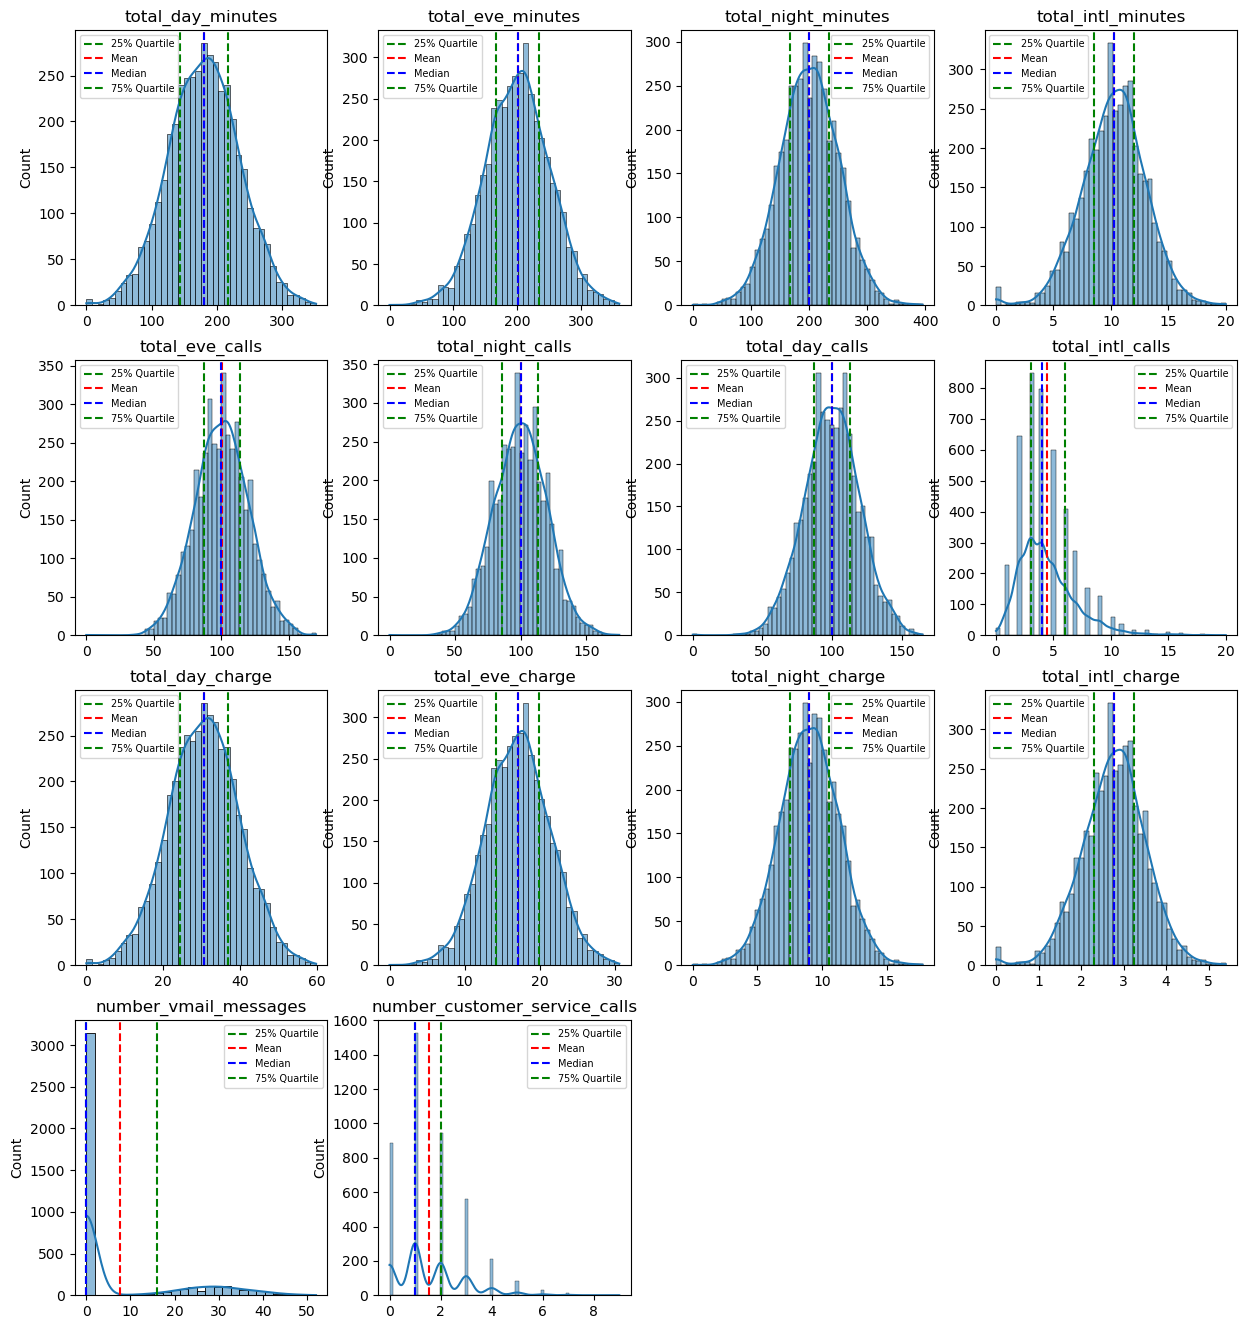

In [109]:
fig = plt.figure(figsize=[15,25])
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for index, col in enumerate(num_cols):
    # Plotting
    ax1 = fig.add_subplot(6,4,index+1)
    ax1 = sns.histplot(train[col], kde=True)

    # Add other stats
    ax1.axvline(train[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax1.axvline(train[col].mean(),color='red',linestyle='--',label='Mean')
    ax1.axvline(train[col].median(),color='blue',linestyle='--',label='Median')
    ax1.axvline(train[col].quantile(q=0.75),color='green',linestyle='--',label='75% Quartile')
    
    # Labelling
    ax1.set_title(f'{col}')
    ax1.set_xlabel('')
    ax1.legend(fontsize=7)
        
plt.show()

1. All the metrics for calls, minutes and charges follow kinda Gaussian distribution.
2. The "number_vmail_messages" is right skewed since lot of users have opted out of voice mail plan
3. About "number_customer_service_calls", not many people call to customer care unless there is a problem or they are unhappy. This could be very useful in predicting churn.

### 2.2 Bivarient Analysis

#### Categorical features

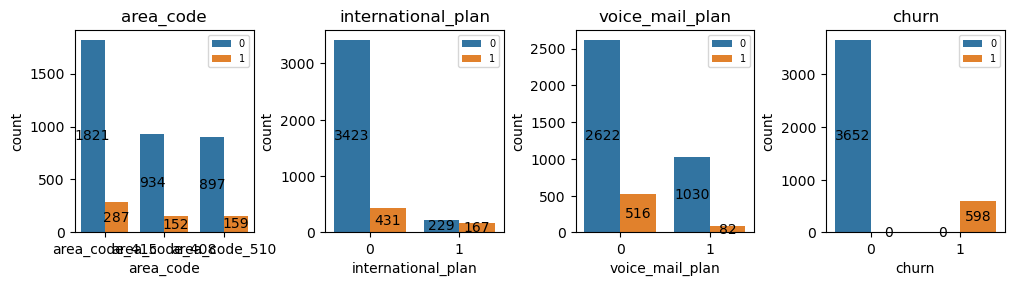

In [152]:
fig = plt.figure(figsize=[12,10])
fig.subplots_adjust(top =0.92, hspace=0.5, wspace=0.4)
for index, col in enumerate(categ_cols):
    # Plotting
    ax3 = fig.add_subplot(3,4,index+1)
    ax3 = sns.countplot(x=train[col], hue=train['churn'])
    
    # Labelling
    ax3.set_title(f'{col}')
    ax3.bar_label(ax3.containers[0], label_type='center')
    ax3.bar_label(ax3.containers[1], label_type='center')
    ax3.legend(fontsize=7)
plt.show()

We can see that the data is imbalanced

#### Numerical features

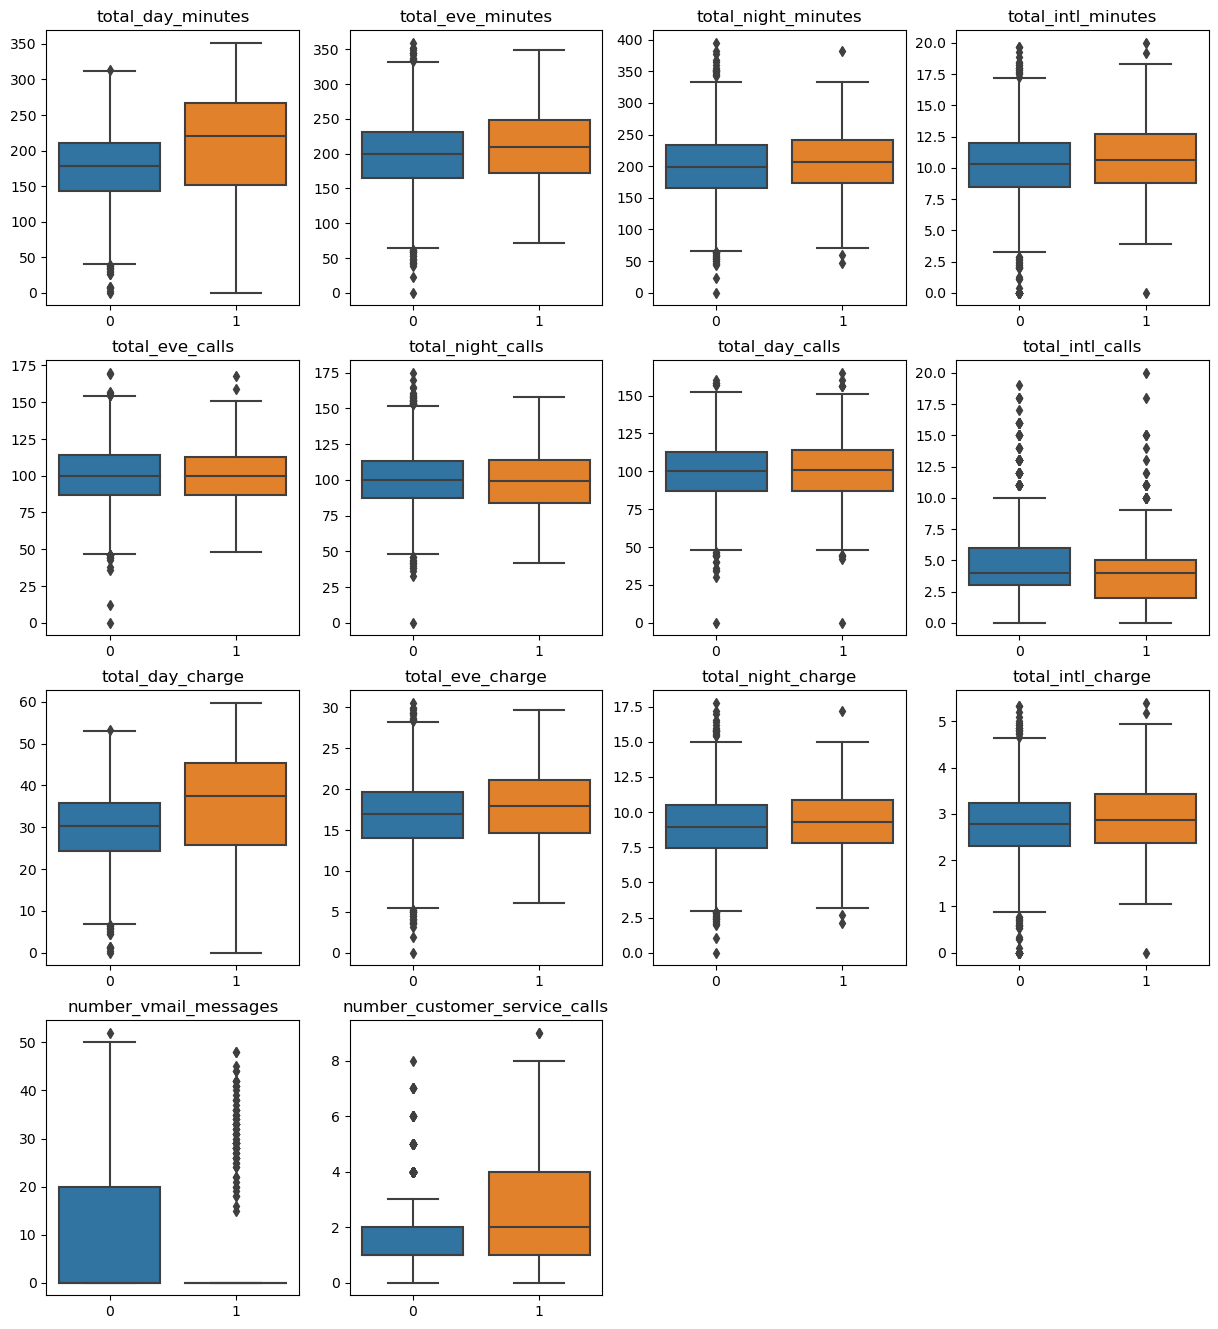

In [158]:
fig = plt.figure(figsize=[15,25])
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for index, col in enumerate(num_cols):
    # Plotting
    ax4 = fig.add_subplot(6,4,index+1)
    ax4 = sns.boxplot(data = train, x='churn', y=train[col])
    
    # Labelling
    ax4.set_title(f'{col}')
    ax4.set_xlabel('')
    ax4.set_ylabel('')
        
plt.show()

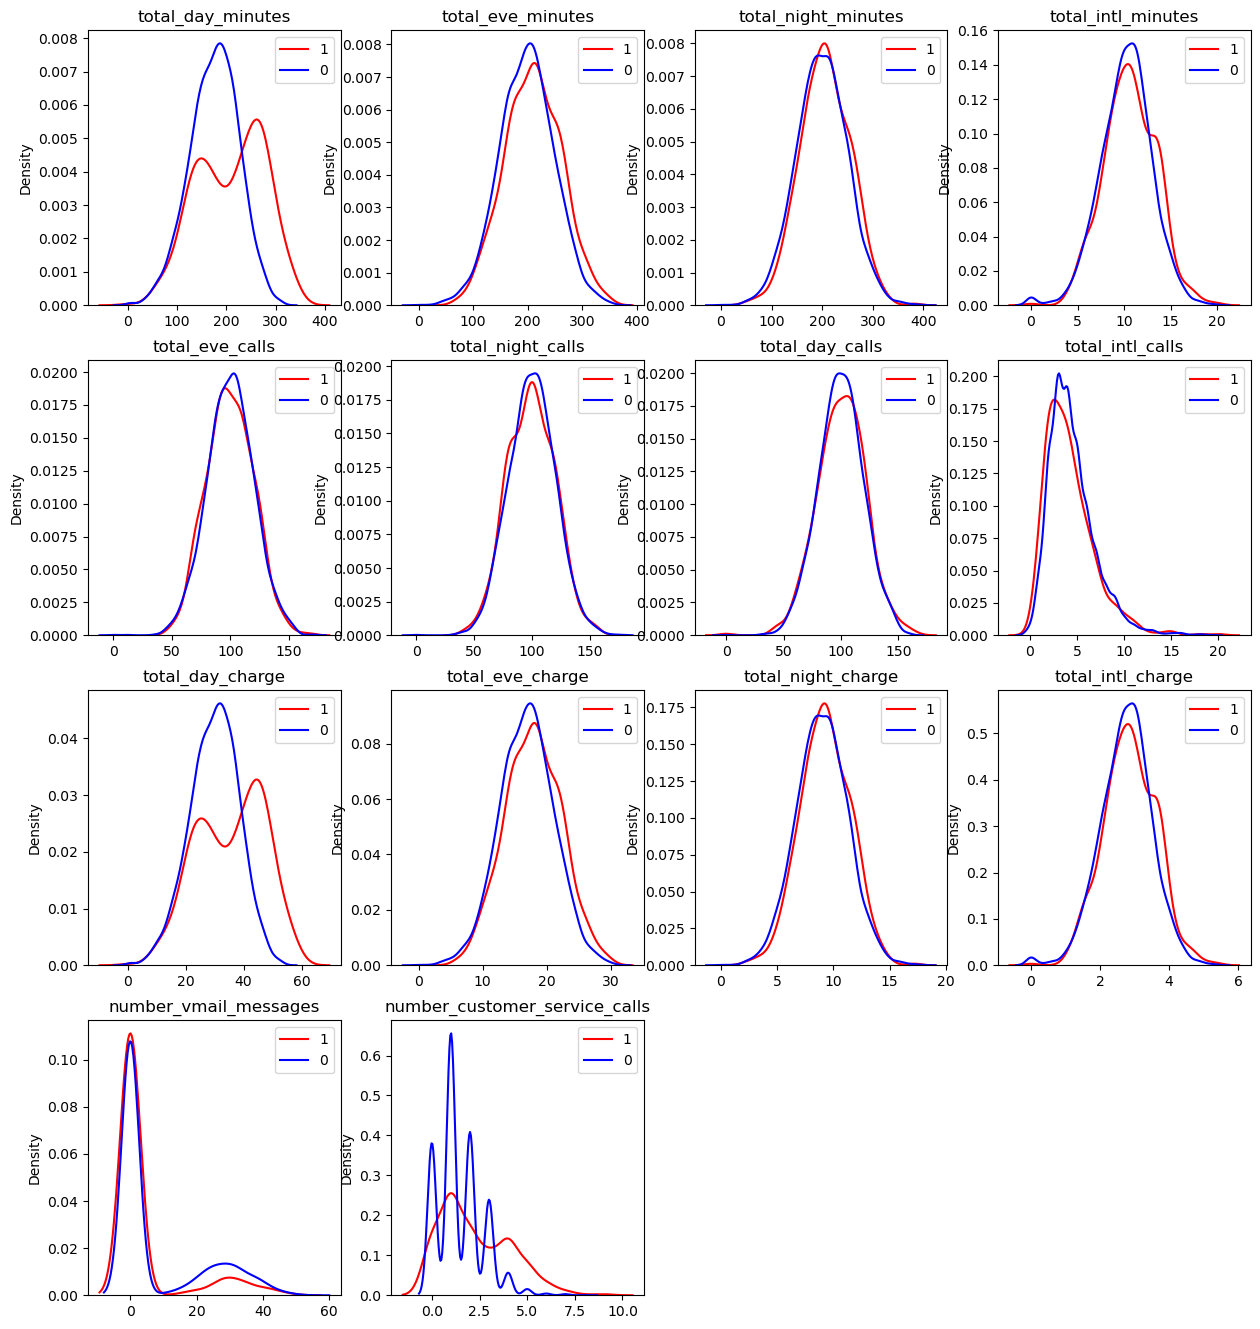

In [164]:
fig = plt.figure(figsize=[15,25])
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for index, col in enumerate(num_cols):
    # Plotting
    ax5 = fig.add_subplot(6,4,index+1)
    ax5 = sns.kdeplot(train[train['churn']==1][col], color='red')
    ax5 = sns.kdeplot(train[train['churn']==0][col], color='blue')
    
    # Labelling
    ax5.set_title(f'{col}')
    ax5.set_xlabel('')
    labels = ['1', '0']
    ax5.legend(labels)
        
plt.show()

1. "total_day_minutes" - it can be seen that customers who churned out had higher average day minutes & so is the day charge
